# Tools
In this lab we will make use of:

NumPy, a popular library for scientific computing

Matplotlib, a popular library for plotting data

Pandas,

In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/hotels-netherlands/HotelFinalDataset.xlsx'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Loading

In [2]:
df = pd.read_excel('C:/Users/haghe/Downloads/HotelFinalDataset.xlsx')


In [3]:
df

,Unnamed: 0,Name,Place,Type,Price,ReviewsCount,Rating,City,State
0,0,BUNK Hotel Amsterdam,"Amsterdam Noord, Amsterdam",Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam
1,1,YOTEL Amsterdam,"Amsterdam Noord, Amsterdam",Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam
2,2,Multatuli Hotel,"Amsterdam City Center, Amsterdam",Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam
3,3,nhow Amsterdam Rai,"Zuideramstel, Amsterdam",nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam
4,4,Motel One Amsterdam,"Zuideramstel, Amsterdam",Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam
...,...,...,...,...,...,...,...,...,...
520,520,Stadslogement Bij de Sassenpoort,Zwolle,Superior Apartment,"₹ 8,899",232.0,8.4,Zwolle,NaN
521,521,Mercure Hotel Zwolle,Zwolle,Standard Double Room,"₹ 10,205",1402.0,7.7,Zwolle,NaN
522,522,The Cabin at Zwolle Centraal,Zwolle,Double Room with Private Bathroom,"₹ 6,123",149.0,7.2,Zwolle,NaN
523,523,Hanze Hotel Zwolle,Zwolle,Standard Twin Room,"₹ 7,789",1095.0,7.2,Zwolle,NaN


We can remove the first column as it is the same as the index of the dataset. The place column is also redundant with the City and State columns


In [4]:
df = df.drop(['Unnamed: 0', 'Place'], axis=1) # axis=1 means we are dropping the column, not the row.

# Data Exploration and Feature Engineering

## Analyze the datasets to identify missing values


In [5]:
# isna(). sum() .
# This returns the columns in our Pandas dataframe along with the number of missing values detected in each one
df.isna().sum()

Name              0
Type              0
Price             0
ReviewsCount     13
Rating           10
City              0
State           392
dtype: int64

There are NaN values in multiple columns. We will remove rows with NaN values in ReviewsCount and Rating. For State we'll use one hot vectors (One-hot encoding is essentially the representation of categorical variables as binary vectors).

In [6]:
df = df[df['ReviewsCount'].notna() & df['Rating'].notna()]


In [7]:
df.groupby('Type').Name.count()

Type
 Deluxe double or Twin Room                       1
1 Queen or King Bed Essential Room                1
2-person Premium Hotelroom                        1
6 Person Room with Private Bathroom and Shower    1
Apartment                                         2
                                                 ..
Two-Bedroom Chalet                                3
Two-Bedroom House                                 6
Two-Bedroom Suite                                 1
bunk                                              1
nhow Double or Twin Room with View                1
Name: Name, Length: 187, dtype: int64

There are many different types of housing. We'll take into account the words that come up often in the description.

In [8]:
data_set = df.Type.values

In [9]:
data_set


array(['Bunk Pod for 2', 'Premium Double Room', 'Double Room',
       'nhow Double or Twin Room with View', 'Double Room',
       'The Innside Guestroom', 'Small Double Room', 'King Room',
       'Standard Double Room', 'Twin Room',
       'Superior Double or Twin Room', 'Small Double Room',
       'Queen Room - Disability Access', 'Standard Double or Twin Room',
       'Double or Twin Room', 'Comfort Double or Twin Room',
       '1 Queen or King Bed Essential Room',
       'Standard Double Room - No Window', 'Small Double Room',
       'Double Room', 'Standard Twin Bunk with Shared Bathroom',
       'Classic Double Room', 'Double Room', 'Twin Room', 'Holiday Home',
       'Holiday Home', 'Holiday Home', 'Holiday Home', 'Holiday Home',
       'Holiday Home', 'Holiday Home', 'Holiday Home',
       'Two-Bedroom House', 'Holiday Home', 'Holiday Home',
       'Holiday Home', 'Holiday Home', 'Holiday Home', 'Holiday Home',
       'Holiday Home', 'Holiday Home', 'Holiday Home', 'Holiday Home

In [10]:
data_set = list(data_set)

In [11]:
data_set


['Bunk Pod for 2',
 'Premium Double Room',
 'Double Room',
 'nhow Double or Twin Room with View',
 'Double Room',
 'The Innside Guestroom',
 'Small Double Room',
 'King Room',
 'Standard Double Room',
 'Twin Room',
 'Superior Double or Twin Room',
 'Small Double Room',
 'Queen Room - Disability Access',
 'Standard Double or Twin Room',
 'Double or Twin Room',
 'Comfort Double or Twin Room',
 '1 Queen or King Bed Essential Room',
 'Standard Double Room - No Window',
 'Small Double Room',
 'Double Room',
 'Standard Twin Bunk with Shared Bathroom',
 'Classic Double Room',
 'Double Room',
 'Twin Room',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Two-Bedroom House',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home'

In [12]:
data_set = ' '.join(data_set)

In [13]:
data_set

'Bunk Pod for 2 Premium Double Room Double Room nhow Double or Twin Room with View Double Room The Innside Guestroom Small Double Room King Room Standard Double Room Twin Room Superior Double or Twin Room Small Double Room Queen Room - Disability Access Standard Double or Twin Room Double or Twin Room Comfort Double or Twin Room 1 Queen or King Bed Essential Room Standard Double Room - No Window Small Double Room Double Room Standard Twin Bunk with Shared Bathroom Classic Double Room Double Room Twin Room Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Two-Bedroom House Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Double Room with Shared Bathroom Two-Bedroom Apartment Two-Bedroom House One-Bedroom Apartment Small Double Room with Shared Bathroom Double Room with Private 

In [14]:
#here we'll output the ten most common words in the Type column
from collections import Counter
split_str = data_set.split()


In [15]:
split_str

['Bunk',
 'Pod',
 'for',
 '2',
 'Premium',
 'Double',
 'Room',
 'Double',
 'Room',
 'nhow',
 'Double',
 'or',
 'Twin',
 'Room',
 'with',
 'View',
 'Double',
 'Room',
 'The',
 'Innside',
 'Guestroom',
 'Small',
 'Double',
 'Room',
 'King',
 'Room',
 'Standard',
 'Double',
 'Room',
 'Twin',
 'Room',
 'Superior',
 'Double',
 'or',
 'Twin',
 'Room',
 'Small',
 'Double',
 'Room',
 'Queen',
 'Room',
 '-',
 'Disability',
 'Access',
 'Standard',
 'Double',
 'or',
 'Twin',
 'Room',
 'Double',
 'or',
 'Twin',
 'Room',
 'Comfort',
 'Double',
 'or',
 'Twin',
 'Room',
 '1',
 'Queen',
 'or',
 'King',
 'Bed',
 'Essential',
 'Room',
 'Standard',
 'Double',
 'Room',
 '-',
 'No',
 'Window',
 'Small',
 'Double',
 'Room',
 'Double',
 'Room',
 'Standard',
 'Twin',
 'Bunk',
 'with',
 'Shared',
 'Bathroom',
 'Classic',
 'Double',
 'Room',
 'Double',
 'Room',
 'Twin',
 'Room',
 'Holiday',
 'Home',
 'Holiday',
 'Home',
 'Holiday',
 'Home',
 'Holiday',
 'Home',
 'Holiday',
 'Home',
 'Holiday',
 'Home',
 'Holida

In [16]:
Counter = Counter(split_str)

common = Counter.most_common(10)
  
print(common)


[('Room', 356), ('Double', 214), ('Twin', 102), ('with', 85), ('Standard', 79), ('Deluxe', 65), ('Apartment', 50), ('Comfort', 47), ('Bathroom', 35), ('One-Bedroom', 32)]


In [17]:
#We can get a list of columns to add to our dataset and make one hot vectors for the types
types = []
for tup in common:
    types.append(tup[0].lower())

In [18]:
print(types)

['room', 'double', 'twin', 'with', 'standard', 'deluxe', 'apartment', 'comfort', 'bathroom', 'one-bedroom']


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
pattern = "(?u)\\b[\\w-]+\\b"
cv = CountVectorizer(vocabulary=types, token_pattern=pattern)

one_hot = pd.DataFrame(cv.fit_transform(df['Type']).todense(), 
                   df.index,
                   cv.get_feature_names_out())

In [20]:
one_hot

,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
520,0,0,0,0,0,0,1,0,0,0
521,1,1,0,0,1,0,0,0,0,0
522,1,1,0,1,0,0,0,0,1,0
523,1,0,1,0,1,0,0,0,0,0


In [21]:
#we convert data types for the columns
one_hot = one_hot.apply(pd.to_numeric)

In [22]:
df = df.join(one_hot)

In [23]:
df

,Name,Type,Price,ReviewsCount,Rating,City,State,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
0,BUNK Hotel Amsterdam,Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam,0,0,0,0,0,0,0,0,0,0
1,YOTEL Amsterdam,Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam,1,1,0,0,0,0,0,0,0,0
2,Multatuli Hotel,Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam,1,1,0,0,0,0,0,0,0,0
3,nhow Amsterdam Rai,nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam,1,1,1,1,0,0,0,0,0,0
4,Motel One Amsterdam,Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,Stadslogement Bij de Sassenpoort,Superior Apartment,"₹ 8,899",232.0,8.4,Zwolle,NaN,0,0,0,0,0,0,1,0,0,0
521,Mercure Hotel Zwolle,Standard Double Room,"₹ 10,205",1402.0,7.7,Zwolle,NaN,1,1,0,0,1,0,0,0,0,0
522,The Cabin at Zwolle Centraal,Double Room with Private Bathroom,"₹ 6,123",149.0,7.2,Zwolle,NaN,1,1,0,1,0,0,0,0,1,0
523,Hanze Hotel Zwolle,Standard Twin Room,"₹ 7,789",1095.0,7.2,Zwolle,NaN,1,0,1,0,1,0,0,0,0,0


In [24]:
df = df.drop(['Type'], axis=1)

In [25]:
#removing the currency symbol
df['Price'] = df['Price'].str.replace('₹', '')
df['Price'] = df['Price'].str.replace(',', '.')
df['Price'] = df['Price'].astype(float)

In [26]:
#one-hots for City
cities = pd.get_dummies(df['City'])
#one-hots for State
states =pd.get_dummies(df['State']) 

In [27]:
df = df.join(cities)
df = df.join(states)

In [28]:
df

,Name,Price,ReviewsCount,Rating,City,State,room,double,twin,with,...,Zuid,Zuideramstel,Zuidwest,Zwolle,Amsterdam,Eindhoven,Maastricht,Rotterdam,The Hague,Utrecht
0,BUNK Hotel Amsterdam,7.887,778.0,8.4,Amsterdam Noord,Amsterdam,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,YOTEL Amsterdam,15.267,500.0,8.1,Amsterdam Noord,Amsterdam,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Multatuli Hotel,13.063,1605.0,7.4,Amsterdam City Center,Amsterdam,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,nhow Amsterdam Rai,12.854,500.0,9.0,Zuideramstel,Amsterdam,1,1,1,1,...,0,1,0,0,1,0,0,0,0,0
4,Motel One Amsterdam,9.471,500.0,8.8,Zuideramstel,Amsterdam,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,Stadslogement Bij de Sassenpoort,8.899,232.0,8.4,Zwolle,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
521,Mercure Hotel Zwolle,10.205,1402.0,7.7,Zwolle,NaN,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
522,The Cabin at Zwolle Centraal,6.123,149.0,7.2,Zwolle,NaN,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
523,Hanze Hotel Zwolle,7.789,1095.0,7.2,Zwolle,NaN,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
Names = df['Name']
df = df.drop(['Name', 'City', 'State'], axis=1)

<AxesSubplot: >

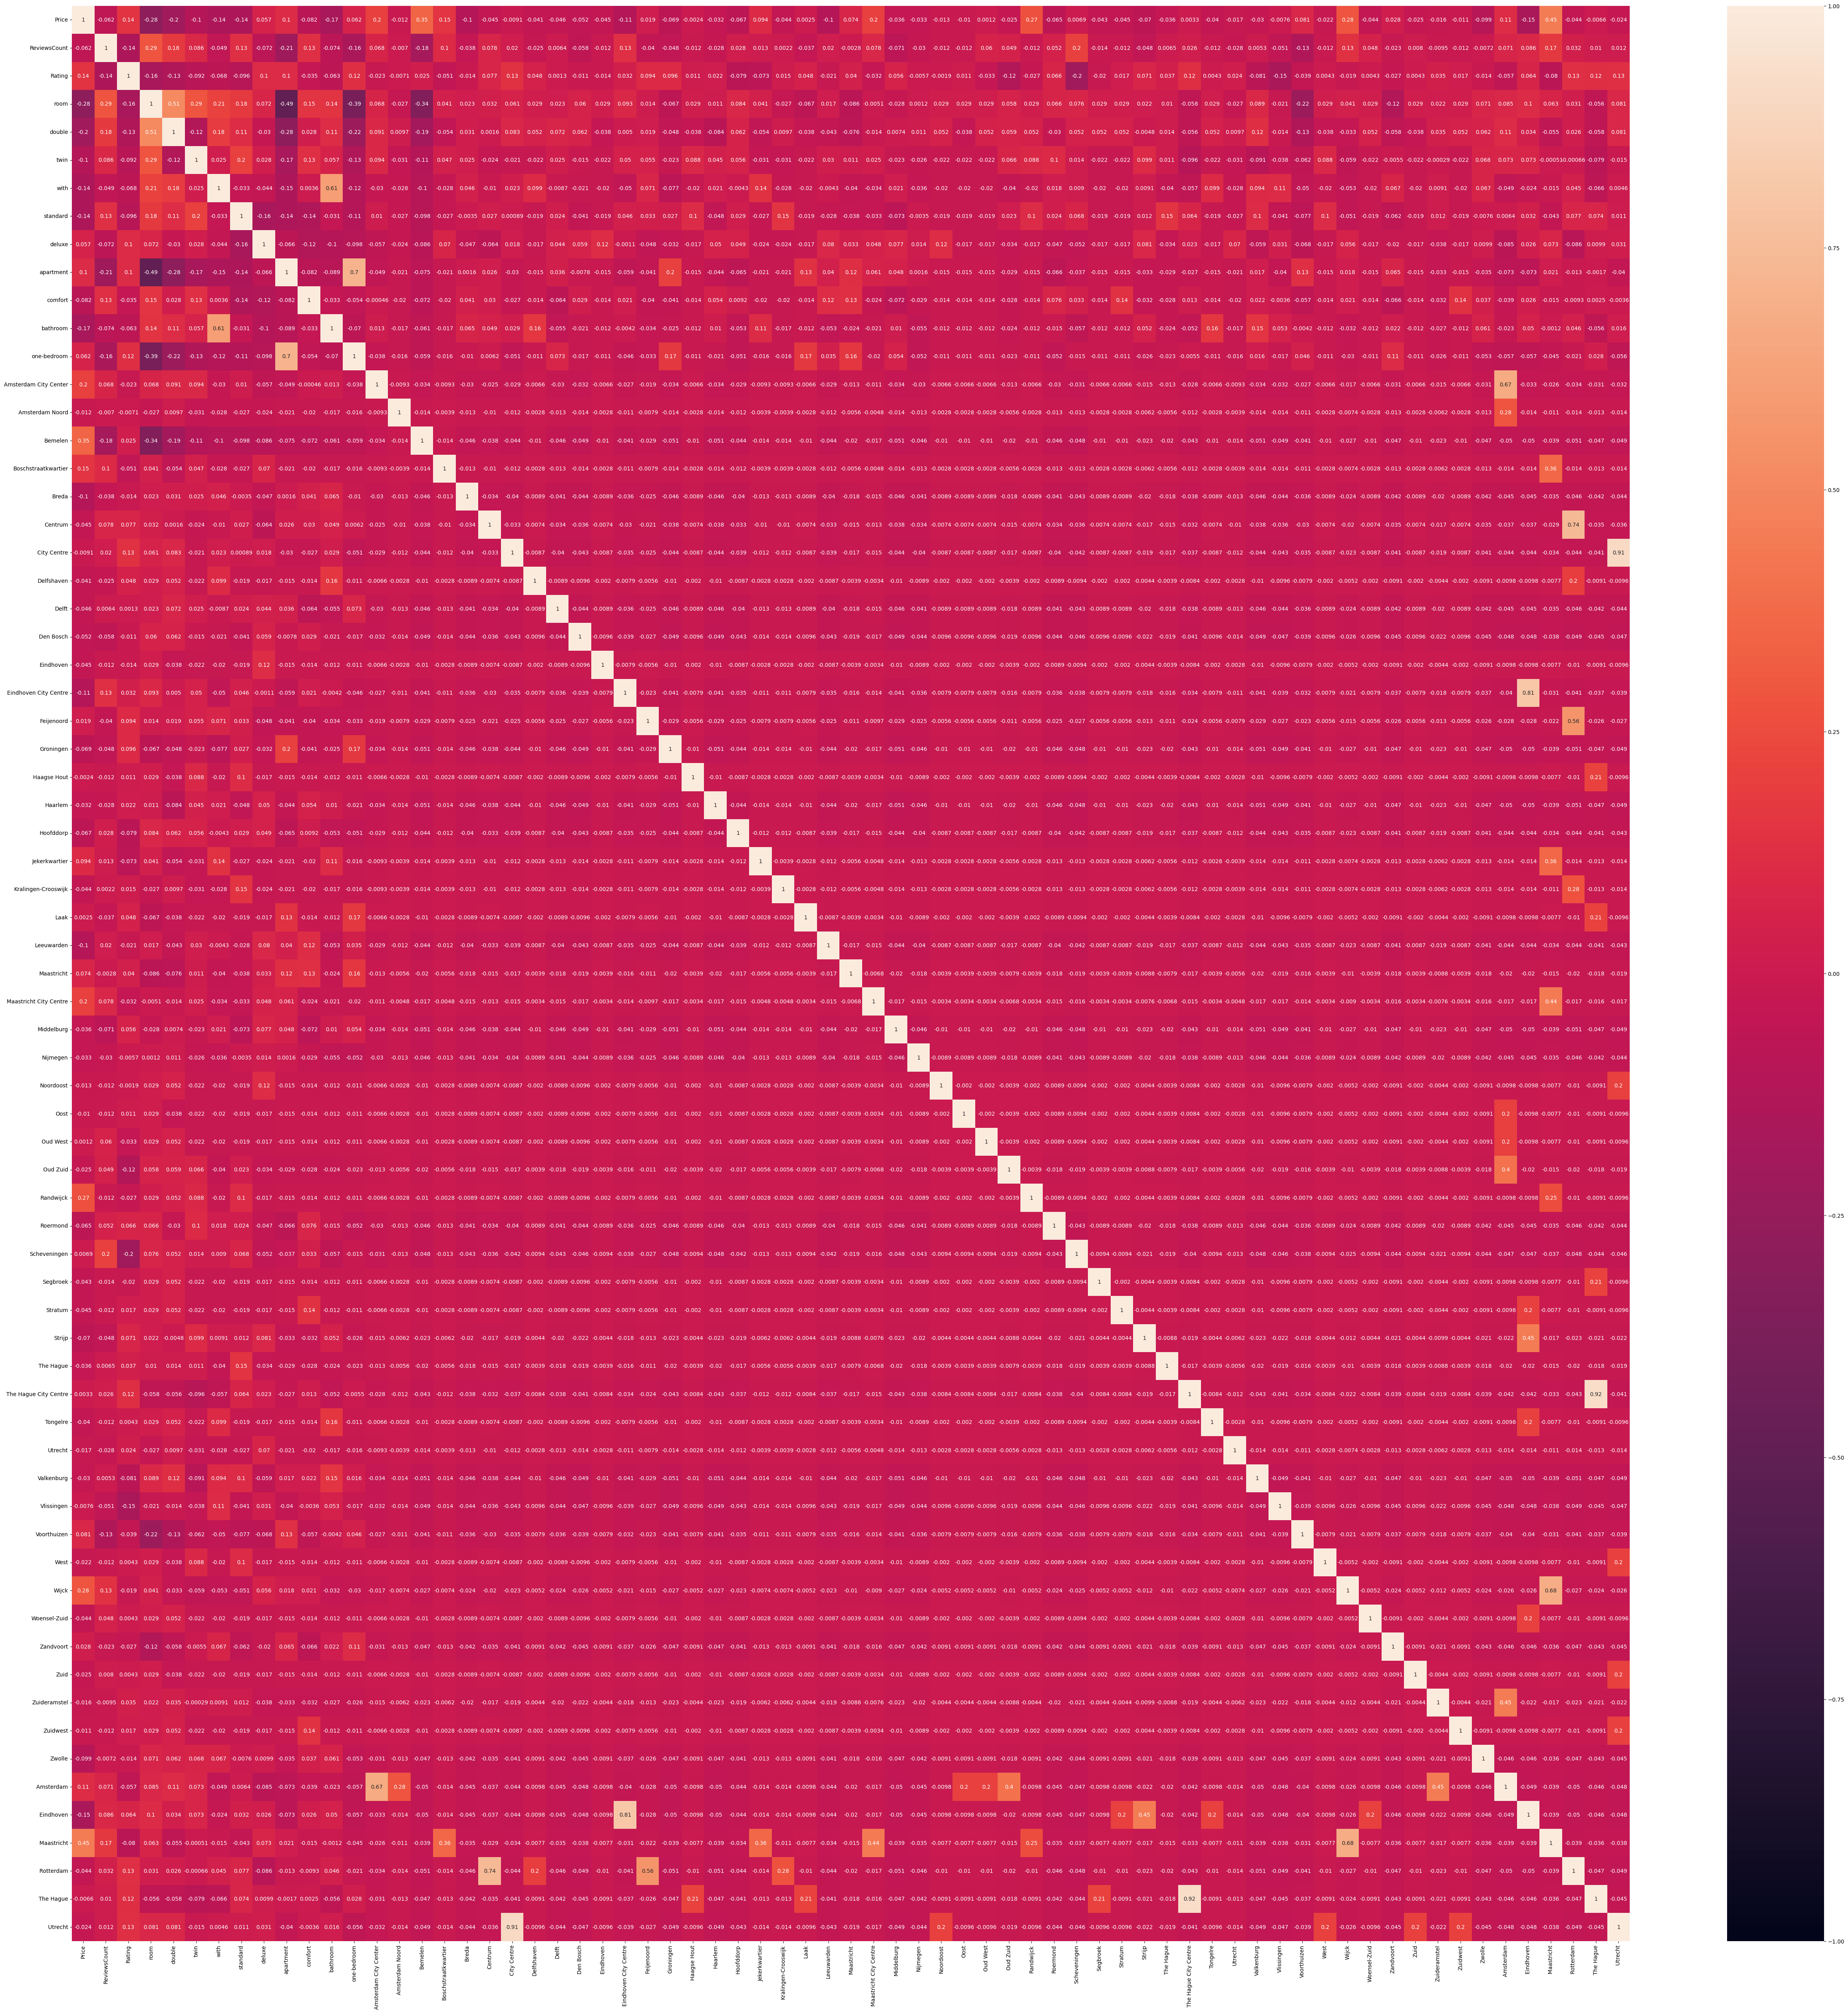

In [31]:
#We can create a heatmap to visualise correlations 
import seaborn as sns # for statistical data visualization
plt.figure(figsize=(64, 64))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [32]:
df

,Price,ReviewsCount,Rating,room,double,twin,with,standard,deluxe,apartment,...,Zuid,Zuideramstel,Zuidwest,Zwolle,Amsterdam,Eindhoven,Maastricht,Rotterdam,The Hague,Utrecht
0,7.887,778.0,8.4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,15.267,500.0,8.1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,13.063,1605.0,7.4,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12.854,500.0,9.0,1,1,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,9.471,500.0,8.8,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,8.899,232.0,8.4,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
521,10.205,1402.0,7.7,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
522,6.123,149.0,7.2,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
523,7.789,1095.0,7.2,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


We now have a lot more columns to work with

## Some Statistics

In [33]:
df[['Price', 'ReviewsCount', 'Rating']].describe()

,Price,ReviewsCount,Rating
count,512.000000,512.000000,512.000000
mean,12.812465,736.556641,8.330273
std,6.514815,879.553639,0.713554
min,3.988000,1.000000,3.700000
25%,8.693000,239.000000,8.000000
50%,11.199500,500.000000,8.400000
75%,14.288000,888.000000,8.800000
max,53.439000,7748.000000,10.000000


For example the mean rating is 8.331456. We can see that we have outliers in the Price and ReviewsCount column. We can remove them

In [34]:
q_low = df['Price'].quantile(0.01)
q_hi  = df['Price'].quantile(0.99)

df = df[(df['Price'] < q_hi) & (df['Price'] > q_low)]

In [35]:
q_low = df['ReviewsCount'].quantile(0.01)
q_hi  = df['ReviewsCount'].quantile(0.99)

df= df[(df['ReviewsCount'] < q_hi) & (df['ReviewsCount'] > q_low)]

In [36]:
df[['Price', 'ReviewsCount', 'Rating']].describe()

,Price,ReviewsCount,Rating
count,480.000000,480.000000,480.000000
mean,12.336273,712.081250,8.345208
std,5.360811,733.011342,0.690268
min,5.364000,2.000000,3.700000
25%,8.741250,266.500000,8.000000
50%,11.022000,500.000000,8.400000
75%,13.883250,888.000000,8.800000
max,34.428000,3803.000000,9.800000


In [37]:
df.groupby('deluxe').Rating.mean() # to get the mean rating of Deluxe type 

deluxe
0    8.316587
1    8.531250
Name: Rating, dtype: float64

deluxe rooms are rated higher, this confirms our intuition.

In [38]:
df=(df-df.mean())/df.std() #  by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

In [39]:
print(df.isna().sum().to_string()) # # This returns the columns in our Pandas dataframe along with the number of missing values detected in each one

Price                       0
ReviewsCount                0
Rating                      0
room                        0
double                      0
twin                        0
with                        0
standard                    0
deluxe                      0
apartment                   0
comfort                     0
bathroom                    0
one-bedroom                 0
Amsterdam City Center       0
Amsterdam Noord             0
Bemelen                     0
Boschstraatkwartier         0
Breda                       0
Centrum                     0
City Centre                 0
Delfshaven                  0
Delft                       0
Den Bosch                   0
Eindhoven                   0
Eindhoven City Centre       0
Feijenoord                  0
Groningen                   0
Haagse Hout                 0
Haarlem                     0
Hoofddorp                   0
Jekerkwartier               0
Kralingen-Crooswijk         0
Laak                        0
Leeuwarden

In [40]:
df

,Price,ReviewsCount,Rating,room,double,twin,with,standard,deluxe,apartment,...,Zuid,Zuideramstel,Zuidwest,Zwolle,Amsterdam,Eindhoven,Maastricht,Rotterdam,The Hague,Utrecht
0,-0.829963,0.089929,0.079377,-1.580737,-0.873563,-0.515689,-0.453432,-0.436657,-0.391823,-0.321299,...,-0.045644,-0.102491,-0.045644,-0.213673,4.452883,-0.21894,-0.166671,-0.224106,-0.213673,-0.224106
1,0.546695,-0.289329,-0.355237,0.618549,1.142352,-0.515689,-0.453432,-0.436657,-0.391823,-0.321299,...,-0.045644,-0.102491,-0.045644,-0.213673,4.452883,-0.21894,-0.166671,-0.224106,-0.213673,-0.224106
2,0.135563,1.218151,-1.369336,0.618549,1.142352,-0.515689,-0.453432,-0.436657,-0.391823,-0.321299,...,-0.045644,-0.102491,-0.045644,-0.213673,4.452883,-0.21894,-0.166671,-0.224106,-0.213673,-0.224106
3,0.096576,-0.289329,0.948605,0.618549,1.142352,1.935112,2.200806,-0.436657,-0.391823,-0.321299,...,-0.045644,9.736636,-0.045644,-0.213673,4.452883,-0.21894,-0.166671,-0.224106,-0.213673,-0.224106
4,-0.534485,-0.289329,0.658863,0.618549,1.142352,-0.515689,-0.453432,-0.436657,-0.391823,-0.321299,...,-0.045644,9.736636,-0.045644,-0.213673,4.452883,-0.21894,-0.166671,-0.224106,-0.213673,-0.224106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,-0.641185,-0.654944,0.079377,-1.580737,-0.873563,-0.515689,-0.453432,-0.436657,-0.391823,3.105886,...,-0.045644,-0.102491,-0.045644,4.670290,-0.224106,-0.21894,-0.166671,-0.224106,-0.213673,-0.224106
521,-0.397565,0.941212,-0.934722,0.618549,1.142352,-0.515689,-0.453432,2.285358,-0.391823,-0.321299,...,-0.045644,-0.102491,-0.045644,4.670290,-0.224106,-0.21894,-0.166671,-0.224106,-0.213673,-0.224106
522,-1.159017,-0.768175,-1.659078,0.618549,1.142352,-0.515689,2.200806,-0.436657,-0.391823,-0.321299,...,-0.045644,-0.102491,-0.045644,4.670290,-0.224106,-0.21894,-0.166671,-0.224106,-0.213673,-0.224106
523,-0.848243,0.522391,-1.659078,0.618549,-0.873563,1.935112,-0.453432,2.285358,-0.391823,-0.321299,...,-0.045644,-0.102491,-0.045644,4.670290,-0.224106,-0.21894,-0.166671,-0.224106,-0.213673,-0.224106


In [41]:
df = df.drop('Randwijck', axis=1) 

# Data Modeling

## Training

Now that we have a usable dataset we can make models using popular regression algorithms

In [42]:
random_state = 0

#We prepare the test and training sets
X = df.drop(['Price'],axis = 1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# test_size : If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
# Random_state : Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.


## First method : Linear Regression

In [43]:
# We use a linear regression first as a baseline method
# CV: Cross-validation is a resampling procedure.
# The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.

model_1 = LinearRegression()
cv = 4 #number of folds
print("R2:")
print(cross_val_score(model_1, X_train.values, y_train.values, cv=cv).mean())
print("MSE:") #MSE determines the average squared difference between the predicted and the actual value of a feature or variable.
print(cross_val_score(model_1, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error').mean())



R2:
-1.0323922539705162e+28
MSE:
-7.498991087617149e+27


In [44]:
# Fit Model
model_1 = model_1.fit(X_train.values, y_train.values)
# Predict
y_test_pred = model_1.predict(X_test.values)

xmin= min(y_test.min(), y_test_pred.min() )-1 #The -1 is used to add a small buffer of one unit to the left of this value, so that the minimum value is not at the edge of the plot.
xmax= max(y_test.max(), y_test_pred.max() )+1



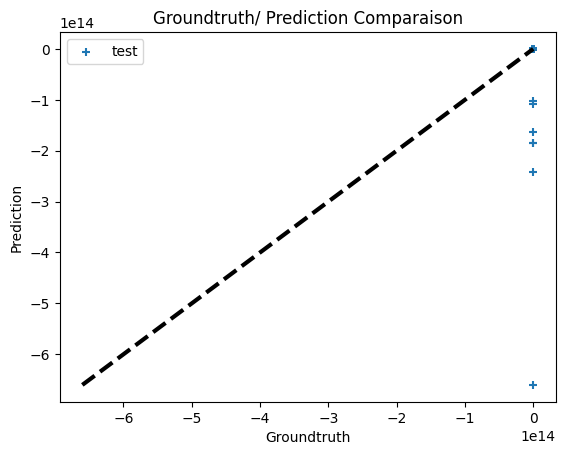

In [45]:
fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='+', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('Groundtruth')
plt.ylabel('Prediction') 
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('LR.png')


With this graph we can see how well our model is doing. The black line corresponds to the equation y=x. Thus, points on the line are perfectly predicted. Points that are far from the line come from a bad prediction.

We get a bad score. Let's test other algorithms :

In [46]:
#The lower the value of the Root Mean Squared Error, the better the model is.
#A perfect model would have a Root Mean Squared Error value of 0.

from sklearn.metrics import mean_squared_error
import math

# Evaluating the performance of the pricing model using Root Mean Squared Error
# Step1: Calculate the difference between the estimated and the actual value using numpy.subtract() function.
# Step2: Further, calculate the square of the above results using numpy.square() function.
# Step3: Finally, calculate the mean of the squared value using numpy.mean() function. The output is the MSE score.
# Step4: At the end, calculate the square root of MSE using math.sqrt() function to get the RMSE value.

MSE2 = mean_squared_error(y_test, y_test_pred)
 
RMSE = math.sqrt(MSE2)
print("Root Mean Square Error:\n")
print(RMSE)


Root Mean Square Error:

65126373638160.2


Mean Absolute Error is the measure of the difference between the two continuous variables. The MAE is the average vertical distance between each actual value and the line that best matches the data. MAE is also the average horizontal distance between each data point and the best matching line.

In [47]:
from sklearn.metrics import mean_absolute_error as mae
# Predicting over the Test Set and calculating error
k = mae(y_test, y_test_pred)
print('Test Mean Absolute Error    ', k )


Test Mean Absolute Error     11411281180254.295


## Second method : Random Forest

Trees algorithms work well on structured tabular data. We can start by using a Random Forest model

In [48]:
model_2 = RandomForestRegressor(random_state= random_state)
print("R2:")
print(cross_val_score(model_2, X_train.values, y_train.values, cv=cv).mean())
print("MSE:")
print(-cross_val_score(model_2, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error').mean())

R2:
0.2682820874884937
MSE:
0.6101546073423513


In [49]:
model_2 = model_2.fit(X_train.values, y_train.values)
y_test_pred = model_2.predict(X_test.values)
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

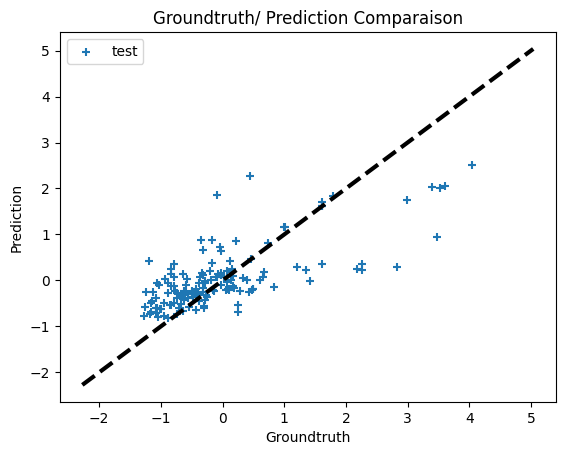

In [50]:
fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='+', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('Groundtruth')
plt.ylabel('Prediction') 
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('RF.png')

We can try another method

## Third Method : Gradient Boosting

In [51]:
model_3 = GradientBoostingRegressor(random_state= random_state)
print("R2:")
print(cross_val_score(model_3, X_train.values, y_train.values, cv=cv).mean())
print("MSE:")
print(-cross_val_score(model_3, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error').mean())

R2:
0.23588808016145982
MSE:
0.6286692366667721


In [52]:
model_3 = model_3.fit(X_train.values, y_train.values)
y_test_pred = model_3.predict(X_test.values)
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

In [53]:
MSE2 = mean_squared_error(y_test, y_test_pred)
 
RMSE = math.sqrt(MSE2)
print("Root Mean Square Error:\n")
print(RMSE)


Root Mean Square Error:

0.786053891804932


In [54]:
# Predicting over the Test Set and calculating error
k = mae(y_test, y_test_pred)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     0.5714652809152765


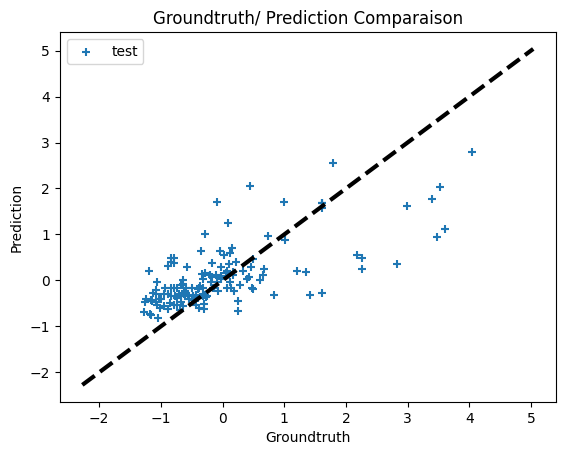

In [55]:
fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='+', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('Groundtruth')
plt.ylabel('Prediction') 
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('XGB.png')


The last two algorithms seem to be promosing

# Hyperparameters Optimization

We'll use a gridsearch to optimize the hyperparameters of the last two models

In [56]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {

    'n_estimators': [100, 150, 200, 400, 500]
}
# Create a based model
rf = RandomForestRegressor(random_state= random_state)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = cv, n_jobs = -1, verbose = 2)

In [57]:
grid_search.fit(X_train.values, y_train.values)
best_grid = grid_search.best_estimator_

Fitting 4 folds for each of 5 candidates, totalling 20 fits


In [58]:
print("R2:")
print(cross_val_score(best_grid, X_train.values, y_train.values, cv=cv).mean())
print("MSE:")
print(-cross_val_score(best_grid, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error').mean())

R2:
0.2748245953984121
MSE:
0.6076509818646378


In [59]:
grid_search.best_params_

{'n_estimators': 200}

In [60]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {

    'n_estimators': [10, 20, 30, 50, 70, 100]
}
# Create a based model
rf = GradientBoostingRegressor(random_state= random_state)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = cv, n_jobs = -1, verbose = 2)

In [61]:
grid_search.fit(X_train.values, y_train.values)
best_grid = grid_search.best_estimator_


Fitting 4 folds for each of 6 candidates, totalling 24 fits


In [62]:
print("R2:")
print(cross_val_score(best_grid, X_train.values, y_train.values, cv=cv).mean())
print("MSE:")
print(-cross_val_score(best_grid, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error').mean())

R2:
0.24272276724568595
MSE:
0.6280302351522266


In [63]:
grid_search.best_params_

{'n_estimators': 70}

## Conclusion 

our best model is the random forest with 200 estimators. We get a R2 of 0.2748245953984121 and a MSE of 0.6076509818646378. This is an encouraging result considering the small size of our dataset.